In [2]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv("C:\\Users\\amogh\\Downloads\\archive (2)\\Admission_Predict.csv")
df=pd.DataFrame(data)
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1    

In [14]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [15]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [17]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [18]:
df.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [53]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<Axes: >

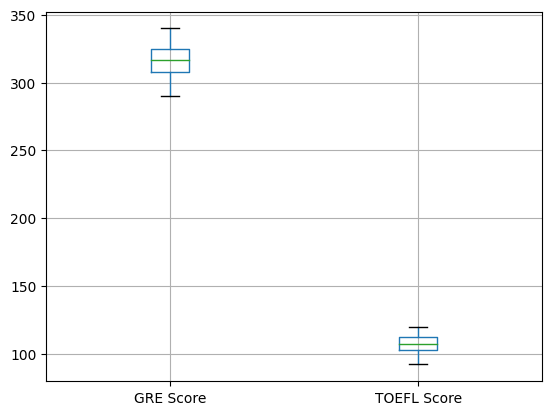

In [60]:
# IDENTIFYING AND REMOVING OUTLIERS (interquartile range method)
df.boxplot(column=["GRE Score","TOEFL Score"])  

<Axes: >

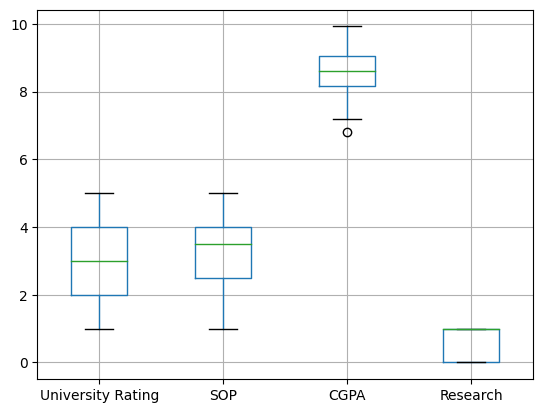

In [58]:
 df.boxplot(column=["University Rating","SOP","CGPA","Research"])

In [65]:
# Calculate quartiles for each feature
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR= Q3-Q1
print(IQR)
    

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.8925
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [67]:
 # Identifying outliers 
df_out1= df[((df<(Q1-1.5 *IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
df_out1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.80,1,0.36
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


In [68]:
# Removing the outliers
df_out= df[~((df <(Q1-1.5*IQR)) |(df>(Q3+1.5*IQR))).any(axis=1)]
df=df_out.copy()
print(df.shape)          # outliers are removed from the data

(396, 8)


Text(0.5, 0, 'Rating')

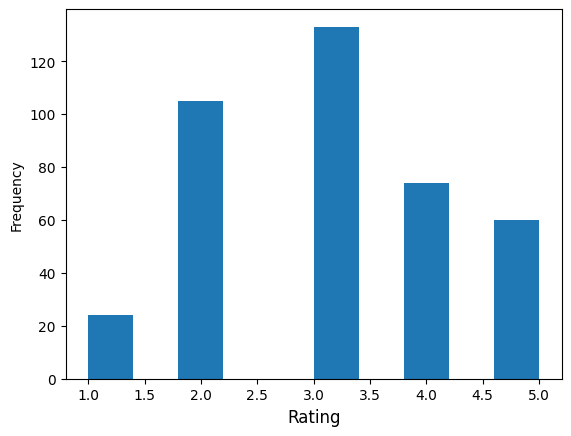

In [71]:
# UNIVARIATE ANALYSIS ( Finding the patterns of the data)


## target variable
df["University Rating"].plot.hist()
plt.xlabel('Rating', fontsize=12)

# maximum students are getting between 3-3.5 rating.

In [72]:
df['Research'].value_counts()

## 218 students have research experience and 178 students don't have any research experience

Research
1    218
0    178
Name: count, dtype: int64

<Axes: xlabel='GRE Score', ylabel='CGPA'>

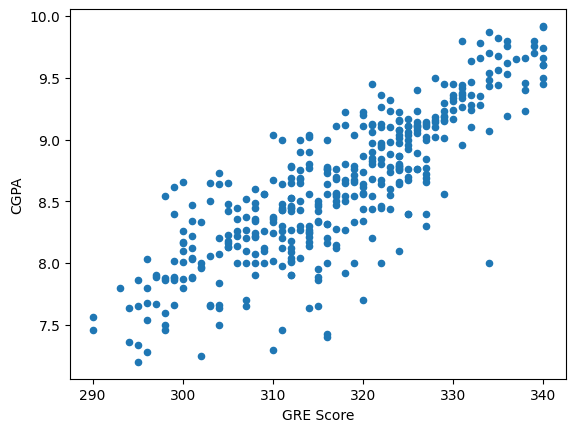

In [76]:
# BIVARIATE ANALYSIS

df.plot.scatter('GRE Score','CGPA')